### Convert RGB images, train set, test set and validation set to vector format

In [2]:
# Load packages
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.transform import resize
import random
from sklearn.model_selection import train_test_split

In [3]:
# most images in the dataset are 80 x 60
def resize_image(img, width=80, height=60):
    return cv.resize(img, (height, width), interpolation=cv.INTER_LINEAR)

In [4]:
# converts from bgr to rgb
def to_rgb_img(img, return_img=False, display_img=True):
  rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  if display_img:
    print_img(rgb_img)

  if return_img:
    return rgb_img

In [5]:
def count_categories_summary(df):
  total = len(df)
  total_pants = len(df[df["articleType"]=="Pants"])
  total_tshirts = len(df[df["articleType"]=="Tshirts"])
  total_watches = len(df[df["articleType"]=="Watches"])
  total_shoes = len(df[df["articleType"]=="Casual Shoes"])
  assert total == total_pants + total_tshirts + total_watches + total_shoes

  print(f"Total rows: {total}, out of which pants: {total_pants}, tshirts: {total_tshirts}, watches: {total_watches}, shoes: {total_shoes}")
  print(f"Pants %: {total_pants / (0.01 * total)}, tshirts %: {total_tshirts / (0.01 * total)}, watches %: {total_watches / (0.01 * total)}, shoes: {total_shoes / (0.01 * total)}")

In [6]:
# Read in data
df = pd.read_pickle('Final Project - Data/data.pkl')

In [7]:
# Looks like there is a null value in here for 1 image
if df[df['image'].isnull()].any()['id']:
  # Drop the null image
  df = df.drop(1961).reset_index(drop=True)

print(df.shape)

(4825, 3)


In [8]:
# Shuffle data
df = df.sample(frac=1)

In [9]:
# Display all columns
df.columns

Index(['id', 'articleType', 'image'], dtype='object')

In [10]:
# Display all classes
df['articleType'].unique()

array(['Tshirts', 'Pants', 'Casual Shoes', 'Watches'], dtype=object)

In [11]:
# Convert data to uint8, resize and convert to rgb
for i in range(len(df)):
  df['image'][i] = df['image'][i].astype(np.uint8)
  df['image'][i] = resize_image(df['image'][i])
  df['image'][i] = to_rgb_img(df['image'][i], return_img=True, display_img=False)

for i in range(len(df)):
  assert df['image'][i].shape == (80, 60, 3)

# drop ID column, not needed
df = df.reset_index(drop=True)

C:\Users\edgomr\AppData\Local\Temp\ipykernel_5708\2163292385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'][i] = df['image'][i].astype(np.uint8)
C:\Users\edgomr\AppData\Local\Temp\ipykernel_5708\2163292385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'][i] = resize_image(df['image'][i])
C:\Users\edgomr\AppData\Local\Temp\ipykernel_5708\2163292385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['i

In [17]:
count_categories_summary(df)

Total rows: 4825, out of which pants: 1138, tshirts: 1116, watches: 1249, shoes: 1322
Pants %: 23.585492227979273, tshirts %: 23.129533678756477, watches %: 25.8860103626943, shoes: 27.39896373056995


In [12]:
from sklearn.model_selection import train_test_split

# TODO: partition examples by category in train, test and val sets
# We want to ensure 70% of shoes land in train, 20% in test, 10% in val

# Specify the proportion for train, test, and validation sets
train_size = 0.7  # 70% for training
test_size = 0.2   # 20% for testing
validation_size = 0.1  # 10% for validation

# Perform the train-test-validation split
train_data, temp_data = train_test_split(df, test_size = 1 - train_size, random_state=42)
test_data, validation_data = train_test_split(temp_data,
                                              test_size=validation_size/(validation_size + test_size),
                                              random_state=42)

# Display the shapes of the resulting DataFrames
print("Train set shape: ", train_data.shape)
print("Test set shape: ", test_data.shape)
print("Validation set shape: ", validation_data.shape)

Train set shape:  (3377, 3)
Test set shape:  (965, 3)
Validation set shape:  (483, 3)


**prepare label key**

In [22]:
label_key = {
    "Pants": 0, 
    "Tshirts":1,
    "Watches":2, 
    "Casual Shoes":3 
 
}

**Define functions to export images to CSV format**

In [39]:
from PIL import Image
import os
import warnings
import time

def images_to_csv2(column_one, csv_path, column_names, images_df):
    # Create a DataFrame to store all image data with column names
    warnings.simplefilter(action='ignore', category=FutureWarning)
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(images_df.shape[0]):
    #for i in range(5):
        # Convert image data to a 1D array
        img_data = images_df.iloc[i,2].flatten()
        img_data = img_data.astype(int)

        # Create a DataFrame with the label and image data
        img_df = pd.DataFrame([np.insert(img_data, 0, column_one[i])], columns=column_names)

        # Append the image data to the main DataFrame
        df = df.append(img_df, ignore_index=True)
        #df.head(1)
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" --- %s seconds ---\n" % \
              (time.time() - start_time), flush=True)
    # Write DataFrame to CSV
    #df=df.clip(lower=0)
    df.to_csv(csv_path, index=False, header=True)   

In [59]:
from PIL import Image
import os
import warnings
import time

def gray_images_to_csv2(column_one, csv_path, column_names, images_df):
    # Create a DataFrame to store all image data with column names
    warnings.simplefilter(action='ignore', category=FutureWarning)
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(images_df.shape[0]):
    #for i in range(5):
        # Convert image data to a 1D array
        img_data = images_df.iloc[i,3].flatten()
        img_data = img_data.astype(int)

        # Create a DataFrame with the label and image data
        img_df = pd.DataFrame([np.insert(img_data, 0, column_one[i])], columns=column_names)

        # Append the image data to the main DataFrame
        df = df.append(img_df, ignore_index=True)
        #df.head(1)
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" --- %s seconds ---\n" % \
              (time.time() - start_time), flush=True)
    # Write DataFrame to CSV
    #df=df.clip(lower=0)
    df.to_csv(csv_path, index=False, header=True)   

In [19]:
def label_column_list(image_df):
    column_one =[]
    for i in range(image_df.shape[0]):
        key = image_df.iloc[i,1]
        value = label_key[key]
        column_one.append(value)
    return column_one
    

In [20]:
def column_names(image_df):
    '''returns a list '''
    im_length =  image_df.iloc[0,2].shape[0]*image_df.iloc[0,2].shape[1]*3 #RGB
    column_name =[]
    column_name.append('label')
    for i in range(im_length):
        c_name = "pixel"+str(i)
        column_name.append(c_name)
    return column_name
    

In [61]:
def gray_column_names(image_df):
    '''returns a list '''
    im_length =  image_df.iloc[0,3].shape[0]*image_df.iloc[0,3].shape[1]*1 #grayscale
    column_name =[]
    column_name.append('label')
    for i in range(im_length):
        c_name = "pixel"+str(i)
        column_name.append(c_name)
    return column_name
    

In [51]:
def grayscaling(img_df):
    img_list = []
    for i in range(img_df.shape[0]):
        foreground = cv.cvtColor(img_df.iloc[i,2], cv.COLOR_BGR2GRAY)
        img_list.append(foreground)
    img_df['gray_image'] = img_list
    return  img_df
    

**We convert RGB Image files into row vectors to be saved in CSV format, for train, test and validation data**

**In my work I mistakenly mislabeled the validation data as test data. I noticed until then end where it would have been difficult to undo. However, I used it consistently, and kept them seperate until the end, therefore the results are consistent through out, and remain valid**

In [40]:
#def images_to_csv2(column_one, csv_path, column_names):
col_name = column_names(validation_data)
col_one_name = label_column_list(validation_data)
images_to_csv2(col_one_name, 'output_rgb_val.csv', col_name, validation_data)

percent complete: 0.0000 --- 0.4962432384490967 seconds ---
percent complete: 0.0021 --- 1.118830919265747 seconds ---
percent complete: 0.0041 --- 1.581063985824585 seconds ---
percent complete: 0.0062 --- 2.05112886428833 seconds ---
percent complete: 0.0083 --- 2.5061914920806885 seconds ---
percent complete: 0.0104 --- 2.9926466941833496 seconds ---
percent complete: 0.0124 --- 3.466649055480957 seconds ---
percent complete: 0.0145 --- 4.0607993602752686 seconds ---
percent complete: 0.0166 --- 4.538511037826538 seconds ---
percent complete: 0.0186 --- 5.11665678024292 seconds ---
percent complete: 0.0207 --- 5.588551998138428 seconds ---
percent complete: 0.0228 --- 6.052258491516113 seconds ---
percent complete: 0.0248 --- 6.663716077804565 seconds ---
percent complete: 0.0269 --- 7.154321908950806 seconds ---
percent complete: 0.0290 --- 7.6388444900512695 seconds ---
percent complete: 0.0311 --- 8.107922792434692 seconds ---
percent complete: 0.0331 --- 8.577821254730225 second

percent complete: 0.2878 --- 82.2663733959198 seconds ---
percent complete: 0.2899 --- 82.84540581703186 seconds ---
percent complete: 0.2919 --- 83.41449022293091 seconds ---
percent complete: 0.2940 --- 83.99106550216675 seconds ---
percent complete: 0.2961 --- 84.68511247634888 seconds ---
percent complete: 0.2981 --- 85.24882531166077 seconds ---
percent complete: 0.3002 --- 85.81469750404358 seconds ---
percent complete: 0.3023 --- 86.36297655105591 seconds ---
percent complete: 0.3043 --- 86.9426839351654 seconds ---
percent complete: 0.3064 --- 87.53806185722351 seconds ---
percent complete: 0.3085 --- 88.22741198539734 seconds ---
percent complete: 0.3106 --- 88.81638741493225 seconds ---
percent complete: 0.3126 --- 89.38155031204224 seconds ---
percent complete: 0.3147 --- 90.06511878967285 seconds ---
percent complete: 0.3168 --- 91.1323914527893 seconds ---
percent complete: 0.3188 --- 92.32499670982361 seconds ---
percent complete: 0.3209 --- 93.10980653762817 seconds ---


percent complete: 0.5735 --- 172.8687915802002 seconds ---
percent complete: 0.5756 --- 173.43273973464966 seconds ---
percent complete: 0.5776 --- 173.99789452552795 seconds ---
percent complete: 0.5797 --- 174.56178283691406 seconds ---
percent complete: 0.5818 --- 175.2709572315216 seconds ---
percent complete: 0.5839 --- 175.82330584526062 seconds ---
percent complete: 0.5859 --- 176.39153456687927 seconds ---
percent complete: 0.5880 --- 176.96979999542236 seconds ---
percent complete: 0.5901 --- 177.55047154426575 seconds ---
percent complete: 0.5921 --- 178.23699378967285 seconds ---
percent complete: 0.5942 --- 178.78437185287476 seconds ---
percent complete: 0.5963 --- 179.34858202934265 seconds ---
percent complete: 0.5983 --- 179.91358375549316 seconds ---
percent complete: 0.6004 --- 180.48084712028503 seconds ---
percent complete: 0.6025 --- 181.05316853523254 seconds ---
percent complete: 0.6046 --- 181.75274205207825 seconds ---
percent complete: 0.6066 --- 182.300773620

percent complete: 0.8592 --- 259.0632014274597 seconds ---
percent complete: 0.8613 --- 259.59737062454224 seconds ---
percent complete: 0.8634 --- 260.14545130729675 seconds ---
percent complete: 0.8654 --- 260.82075691223145 seconds ---
percent complete: 0.8675 --- 261.3538763523102 seconds ---
percent complete: 0.8696 --- 261.88751792907715 seconds ---
percent complete: 0.8716 --- 262.4367582798004 seconds ---
percent complete: 0.8737 --- 262.98477005958557 seconds ---
percent complete: 0.8758 --- 263.51882553100586 seconds ---
percent complete: 0.8778 --- 264.19302225112915 seconds ---
percent complete: 0.8799 --- 264.7253837585449 seconds ---
percent complete: 0.8820 --- 265.2601113319397 seconds ---
percent complete: 0.8841 --- 265.80985951423645 seconds ---
percent complete: 0.8861 --- 266.7978310585022 seconds ---
percent complete: 0.8882 --- 267.88153100013733 seconds ---
percent complete: 0.8903 --- 268.7126896381378 seconds ---
percent complete: 0.8923 --- 269.2621726989746 

**RGB Test data converted to vector format**

In [43]:
col_name = column_names(test_data)
col_one_name = label_column_list(test_data)
images_to_csv2(col_one_name, 'output_rgb_test.csv', col_name, test_data)

percent complete: 0.0000 --- 0.6952238082885742 seconds ---
percent complete: 0.0010 --- 1.3597490787506104 seconds ---
percent complete: 0.0021 --- 1.8641047477722168 seconds ---
percent complete: 0.0031 --- 2.358193874359131 seconds ---
percent complete: 0.0041 --- 2.8297598361968994 seconds ---
percent complete: 0.0052 --- 3.306915283203125 seconds ---
percent complete: 0.0062 --- 3.9189186096191406 seconds ---
percent complete: 0.0073 --- 4.407711982727051 seconds ---
percent complete: 0.0083 --- 4.88848090171814 seconds ---
percent complete: 0.0093 --- 5.562231779098511 seconds ---
percent complete: 0.0104 --- 6.109892845153809 seconds ---
percent complete: 0.0114 --- 6.869628667831421 seconds ---
percent complete: 0.0124 --- 7.543829441070557 seconds ---
percent complete: 0.0135 --- 8.05094575881958 seconds ---
percent complete: 0.0145 --- 8.547175407409668 seconds ---
percent complete: 0.0155 --- 9.044301748275757 seconds ---
percent complete: 0.0166 --- 9.530253171920776 second

percent complete: 0.1440 --- 82.4595398902893 seconds ---
percent complete: 0.1451 --- 82.92687654495239 seconds ---
percent complete: 0.1461 --- 83.40997433662415 seconds ---
percent complete: 0.1472 --- 83.877938747406 seconds ---
percent complete: 0.1482 --- 84.48496699333191 seconds ---
percent complete: 0.1492 --- 84.97587370872498 seconds ---
percent complete: 0.1503 --- 85.52376556396484 seconds ---
percent complete: 0.1513 --- 86.15956497192383 seconds ---
percent complete: 0.1523 --- 86.66157841682434 seconds ---
percent complete: 0.1534 --- 87.25394177436829 seconds ---
percent complete: 0.1544 --- 87.73020792007446 seconds ---
percent complete: 0.1554 --- 88.2125940322876 seconds ---
percent complete: 0.1565 --- 88.6962902545929 seconds ---
percent complete: 0.1575 --- 89.16457772254944 seconds ---
percent complete: 0.1585 --- 89.64700818061829 seconds ---
percent complete: 0.1596 --- 90.2397391796112 seconds ---
percent complete: 0.1606 --- 90.69922590255737 seconds ---
per

percent complete: 0.2870 --- 156.19840359687805 seconds ---
percent complete: 0.2881 --- 156.68053722381592 seconds ---
percent complete: 0.2891 --- 157.164532661438 seconds ---
percent complete: 0.2902 --- 157.77338242530823 seconds ---
percent complete: 0.2912 --- 158.27167558670044 seconds ---
percent complete: 0.2922 --- 158.98943328857422 seconds ---
percent complete: 0.2933 --- 159.73228120803833 seconds ---
percent complete: 0.2943 --- 160.59184002876282 seconds ---
percent complete: 0.2953 --- 161.16169500350952 seconds ---
percent complete: 0.2964 --- 161.77587127685547 seconds ---
percent complete: 0.2974 --- 162.2680127620697 seconds ---
percent complete: 0.2984 --- 162.7530961036682 seconds ---
percent complete: 0.2995 --- 163.23622369766235 seconds ---
percent complete: 0.3005 --- 163.7030942440033 seconds ---
percent complete: 0.3016 --- 164.32813167572021 seconds ---
percent complete: 0.3026 --- 164.8243887424469 seconds ---
percent complete: 0.3036 --- 165.3106911182403

percent complete: 0.4301 --- 232.82483959197998 seconds ---
percent complete: 0.4311 --- 233.3052306175232 seconds ---
percent complete: 0.4321 --- 233.8247458934784 seconds ---
percent complete: 0.4332 --- 234.46655678749084 seconds ---
percent complete: 0.4342 --- 234.9553120136261 seconds ---
percent complete: 0.4352 --- 235.47397589683533 seconds ---
percent complete: 0.4363 --- 235.97354364395142 seconds ---
percent complete: 0.4373 --- 236.47275161743164 seconds ---
percent complete: 0.4383 --- 237.1008415222168 seconds ---
percent complete: 0.4394 --- 237.59117889404297 seconds ---
percent complete: 0.4404 --- 238.12190794944763 seconds ---
percent complete: 0.4415 --- 238.764821767807 seconds ---
percent complete: 0.4425 --- 239.65000319480896 seconds ---
percent complete: 0.4435 --- 240.62779879570007 seconds ---
percent complete: 0.4446 --- 241.4541051387787 seconds ---
percent complete: 0.4456 --- 241.96089434623718 seconds ---
percent complete: 0.4466 --- 242.49701809883118

percent complete: 0.5731 --- 317.77214765548706 seconds ---
percent complete: 0.5741 --- 318.3659043312073 seconds ---
percent complete: 0.5751 --- 319.53779554367065 seconds ---
percent complete: 0.5762 --- 320.53780698776245 seconds ---
percent complete: 0.5772 --- 321.584712266922 seconds ---
percent complete: 0.5782 --- 322.1784465312958 seconds ---
percent complete: 0.5793 --- 322.7722029685974 seconds ---
percent complete: 0.5803 --- 323.381605386734 seconds ---
percent complete: 0.5813 --- 324.1159677505493 seconds ---
percent complete: 0.5824 --- 324.67847442626953 seconds ---
percent complete: 0.5834 --- 325.2722306251526 seconds ---
percent complete: 0.5845 --- 325.897243976593 seconds ---
percent complete: 0.5855 --- 326.4753692150116 seconds ---
percent complete: 0.5865 --- 327.1941270828247 seconds ---
percent complete: 0.5876 --- 327.77225828170776 seconds ---
percent complete: 0.5886 --- 328.366014957428 seconds ---
percent complete: 0.5896 --- 328.94414710998535 seconds

percent complete: 0.7171 --- 422.5445919036865 seconds ---
percent complete: 0.7181 --- 423.3102309703827 seconds ---
percent complete: 0.7192 --- 423.90395975112915 seconds ---
percent complete: 0.7202 --- 424.5133421421051 seconds ---
percent complete: 0.7212 --- 425.1383535861969 seconds ---
percent complete: 0.7223 --- 425.73212575912476 seconds ---
percent complete: 0.7233 --- 426.4664885997772 seconds ---
percent complete: 0.7244 --- 427.0602660179138 seconds ---
percent complete: 0.7254 --- 427.68525314331055 seconds ---
percent complete: 0.7264 --- 428.2946343421936 seconds ---
percent complete: 0.7275 --- 428.9196403026581 seconds ---
percent complete: 0.7285 --- 429.54466915130615 seconds ---
percent complete: 0.7295 --- 430.27903032302856 seconds ---
percent complete: 0.7306 --- 431.3415460586548 seconds ---
percent complete: 0.7316 --- 432.40405535697937 seconds ---
percent complete: 0.7326 --- 433.4978220462799 seconds ---
percent complete: 0.7337 --- 434.12284421920776 se

percent complete: 0.8611 --- 518.7288324832916 seconds ---
percent complete: 0.8622 --- 519.3069636821747 seconds ---
percent complete: 0.8632 --- 519.8850963115692 seconds ---
percent complete: 0.8642 --- 520.4475808143616 seconds ---
percent complete: 0.8653 --- 521.0413429737091 seconds ---
percent complete: 0.8663 --- 521.74449634552 seconds ---
percent complete: 0.8674 --- 522.3226020336151 seconds ---
percent complete: 0.8684 --- 522.8851084709167 seconds ---
percent complete: 0.8694 --- 523.4788644313812 seconds ---
percent complete: 0.8705 --- 524.0726211071014 seconds ---
percent complete: 0.8715 --- 524.7913792133331 seconds ---
percent complete: 0.8725 --- 525.3695161342621 seconds ---
percent complete: 0.8736 --- 525.9476418495178 seconds ---
percent complete: 0.8746 --- 526.5882906913757 seconds ---
percent complete: 0.8756 --- 527.6039109230042 seconds ---
percent complete: 0.8767 --- 528.5570509433746 seconds ---
percent complete: 0.8777 --- 529.5258069038391 seconds ---

**RGB Train data converted to vector format**

In [48]:
col_name = column_names(train_data)
col_one_name = label_column_list(train_data)
images_to_csv2(col_one_name, 'output_rgb.csv', col_name, train_data)

percent complete: 0.0000 --- 0.4501478672027588 seconds ---
percent complete: 0.0003 --- 1.0916152000427246 seconds ---
percent complete: 0.0006 --- 1.560563564300537 seconds ---
percent complete: 0.0009 --- 2.0324172973632812 seconds ---
percent complete: 0.0012 --- 2.5031490325927734 seconds ---
percent complete: 0.0015 --- 3.333141803741455 seconds ---
percent complete: 0.0018 --- 4.026700973510742 seconds ---
percent complete: 0.0021 --- 4.9989705085754395 seconds ---
percent complete: 0.0024 --- 5.506299018859863 seconds ---
percent complete: 0.0027 --- 6.098065614700317 seconds ---
percent complete: 0.0030 --- 6.615041494369507 seconds ---
percent complete: 0.0033 --- 7.067044496536255 seconds ---
percent complete: 0.0036 --- 7.683110475540161 seconds ---
percent complete: 0.0038 --- 8.169671058654785 seconds ---
percent complete: 0.0041 --- 8.693881750106812 seconds ---
percent complete: 0.0044 --- 9.158057928085327 seconds ---
percent complete: 0.0047 --- 9.625405311584473 seco

percent complete: 0.0412 --- 73.648024559021 seconds ---
percent complete: 0.0415 --- 74.11677503585815 seconds ---
percent complete: 0.0418 --- 74.569904088974 seconds ---
percent complete: 0.0420 --- 75.03866028785706 seconds ---
percent complete: 0.0423 --- 75.50741505622864 seconds ---
percent complete: 0.0426 --- 76.10117959976196 seconds ---
percent complete: 0.0429 --- 76.56995224952698 seconds ---
percent complete: 0.0432 --- 77.03868961334229 seconds ---
percent complete: 0.0435 --- 77.5074372291565 seconds ---
percent complete: 0.0438 --- 77.99184274673462 seconds ---
percent complete: 0.0441 --- 78.4605975151062 seconds ---
percent complete: 0.0444 --- 79.05432939529419 seconds ---
percent complete: 0.0447 --- 79.52309274673462 seconds ---
percent complete: 0.0450 --- 79.9918646812439 seconds ---
percent complete: 0.0453 --- 80.44496965408325 seconds ---
percent complete: 0.0456 --- 80.92937541007996 seconds ---
percent complete: 0.0459 --- 81.52310705184937 seconds ---
perc

percent complete: 0.0820 --- 145.68009281158447 seconds ---
percent complete: 0.0823 --- 146.18007349967957 seconds ---
percent complete: 0.0826 --- 146.7425799369812 seconds ---
percent complete: 0.0829 --- 147.50821352005005 seconds ---
percent complete: 0.0832 --- 148.3050971031189 seconds ---
percent complete: 0.0835 --- 149.16450762748718 seconds ---
percent complete: 0.0838 --- 149.6332619190216 seconds ---
percent complete: 0.0841 --- 150.1020166873932 seconds ---
percent complete: 0.0844 --- 150.5863974094391 seconds ---
percent complete: 0.0847 --- 151.11762762069702 seconds ---
percent complete: 0.0850 --- 151.7426598072052 seconds ---
percent complete: 0.0853 --- 152.21139073371887 seconds ---
percent complete: 0.0856 --- 152.6801459789276 seconds ---
percent complete: 0.0859 --- 153.16452646255493 seconds ---
percent complete: 0.0862 --- 153.63330674171448 seconds ---
percent complete: 0.0865 --- 154.11766123771667 seconds ---
percent complete: 0.0868 --- 154.71141839027405

percent complete: 0.1229 --- 220.770911693573 seconds ---
percent complete: 0.1232 --- 221.25526690483093 seconds ---
percent complete: 0.1235 --- 221.73967242240906 seconds ---
percent complete: 0.1238 --- 222.25527667999268 seconds ---
percent complete: 0.1241 --- 222.91154289245605 seconds ---
percent complete: 0.1244 --- 223.4115650653839 seconds ---
percent complete: 0.1247 --- 223.89592576026917 seconds ---
percent complete: 0.1250 --- 224.3803005218506 seconds ---
percent complete: 0.1253 --- 224.8647060394287 seconds ---
percent complete: 0.1256 --- 225.36468625068665 seconds ---
percent complete: 0.1259 --- 225.97406840324402 seconds ---
percent complete: 0.1261 --- 226.48972415924072 seconds ---
percent complete: 0.1264 --- 227.30220890045166 seconds ---
percent complete: 0.1267 --- 228.06784415245056 seconds ---
percent complete: 0.1270 --- 228.88035106658936 seconds ---
percent complete: 0.1273 --- 229.52100801467896 seconds ---
percent complete: 0.1276 --- 230.005364179611

percent complete: 0.1638 --- 301.98543071746826 seconds ---
percent complete: 0.1641 --- 302.5479311943054 seconds ---
percent complete: 0.1643 --- 303.1104578971863 seconds ---
percent complete: 0.1646 --- 303.688574552536 seconds ---
percent complete: 0.1649 --- 304.3760759830475 seconds ---
percent complete: 0.1652 --- 304.9542284011841 seconds ---
percent complete: 0.1655 --- 305.51673460006714 seconds ---
percent complete: 0.1658 --- 306.0792200565338 seconds ---
percent complete: 0.1661 --- 306.7511031627655 seconds ---
percent complete: 0.1664 --- 307.87611532211304 seconds ---
percent complete: 0.1667 --- 308.9230020046234 seconds ---
percent complete: 0.1670 --- 309.65738463401794 seconds ---
percent complete: 0.1673 --- 310.2355372905731 seconds ---
percent complete: 0.1676 --- 310.79802799224854 seconds ---
percent complete: 0.1679 --- 311.3605287075043 seconds ---
percent complete: 0.1682 --- 312.0636610984802 seconds ---
percent complete: 0.1685 --- 312.626172542572 second

percent complete: 0.2046 --- 395.101966381073 seconds ---
percent complete: 0.2049 --- 395.7269878387451 seconds ---
percent complete: 0.2052 --- 396.3412539958954 seconds ---
percent complete: 0.2055 --- 397.075621843338 seconds ---
percent complete: 0.2058 --- 397.66937351226807 seconds ---
percent complete: 0.2061 --- 398.27877497673035 seconds ---
percent complete: 0.2064 --- 398.9037823677063 seconds ---
percent complete: 0.2067 --- 399.52878975868225 seconds ---
percent complete: 0.2070 --- 400.1381504535675 seconds ---
percent complete: 0.2073 --- 400.8569083213806 seconds ---
percent complete: 0.2076 --- 401.4663107395172 seconds ---
percent complete: 0.2079 --- 402.06006717681885 seconds ---
percent complete: 0.2082 --- 402.76317954063416 seconds ---
percent complete: 0.2085 --- 403.8413188457489 seconds ---
percent complete: 0.2088 --- 405.1694564819336 seconds ---
percent complete: 0.2091 --- 405.9194846153259 seconds ---
percent complete: 0.2094 --- 406.5288460254669 second

percent complete: 0.2455 --- 487.5280830860138 seconds ---
percent complete: 0.2458 --- 488.10621333122253 seconds ---
percent complete: 0.2461 --- 488.684366941452 seconds ---
percent complete: 0.2464 --- 489.40312910079956 seconds ---
percent complete: 0.2467 --- 489.96561002731323 seconds ---
percent complete: 0.2470 --- 490.55936670303345 seconds ---
percent complete: 0.2473 --- 491.137503862381 seconds ---
percent complete: 0.2476 --- 491.71565413475037 seconds ---
percent complete: 0.2479 --- 492.4187881946564 seconds ---
percent complete: 0.2481 --- 492.98129510879517 seconds ---
percent complete: 0.2484 --- 493.54377484321594 seconds ---
percent complete: 0.2487 --- 494.121906042099 seconds ---
percent complete: 0.2490 --- 494.68443727493286 seconds ---
percent complete: 0.2493 --- 495.26254963874817 seconds ---
percent complete: 0.2496 --- 495.9656825065613 seconds ---
percent complete: 0.2499 --- 496.52820897102356 seconds ---
percent complete: 0.2502 --- 497.10631942749023 s

percent complete: 0.2866 --- 576.2865858078003 seconds ---
percent complete: 0.2869 --- 576.9897196292877 seconds ---
percent complete: 0.2872 --- 577.5522501468658 seconds ---
percent complete: 0.2875 --- 578.1303820610046 seconds ---
percent complete: 0.2878 --- 578.81786942482 seconds ---
percent complete: 0.2881 --- 579.8178753852844 seconds ---
percent complete: 0.2884 --- 580.8803911209106 seconds ---
percent complete: 0.2887 --- 581.7085208892822 seconds ---
percent complete: 0.2890 --- 582.286673784256 seconds ---
percent complete: 0.2893 --- 582.8804104328156 seconds ---
percent complete: 0.2896 --- 583.4585402011871 seconds ---
percent complete: 0.2899 --- 584.0366718769073 seconds ---
percent complete: 0.2902 --- 584.7398042678833 seconds ---
percent complete: 0.2905 --- 585.3335862159729 seconds ---
percent complete: 0.2908 --- 585.9117178916931 seconds ---
percent complete: 0.2911 --- 586.4898240566254 seconds ---
percent complete: 0.2914 --- 587.0679602622986 seconds ---


percent complete: 0.3281 --- 670.1324787139893 seconds ---
percent complete: 0.3284 --- 670.7105844020844 seconds ---
percent complete: 0.3287 --- 671.3043665885925 seconds ---
percent complete: 0.3290 --- 671.8980977535248 seconds ---
percent complete: 0.3293 --- 672.6012301445007 seconds ---
percent complete: 0.3296 --- 673.1950118541718 seconds ---
percent complete: 0.3299 --- 673.7887692451477 seconds ---
percent complete: 0.3302 --- 674.382504940033 seconds ---
percent complete: 0.3305 --- 675.3981368541718 seconds ---
percent complete: 0.3308 --- 676.3981475830078 seconds ---
percent complete: 0.3311 --- 677.538786649704 seconds ---
percent complete: 0.3314 --- 678.1325414180756 seconds ---
percent complete: 0.3317 --- 678.7263236045837 seconds ---
percent complete: 0.3320 --- 679.335705280304 seconds ---
percent complete: 0.3322 --- 679.9294364452362 seconds ---
percent complete: 0.3325 --- 680.6638255119324 seconds ---
percent complete: 0.3328 --- 681.2419509887695 seconds ---


percent complete: 0.3696 --- 765.0554053783417 seconds ---
percent complete: 0.3699 --- 765.6491363048553 seconds ---
percent complete: 0.3702 --- 766.3835198879242 seconds ---
percent complete: 0.3704 --- 766.9773025512695 seconds ---
percent complete: 0.3707 --- 767.5866837501526 seconds ---
percent complete: 0.3710 --- 768.1960396766663 seconds ---
percent complete: 0.3713 --- 768.805427312851 seconds ---
percent complete: 0.3716 --- 769.5398044586182 seconds ---
percent complete: 0.3719 --- 770.1491868495941 seconds ---
percent complete: 0.3722 --- 770.8991980552673 seconds ---
percent complete: 0.3725 --- 771.9617071151733 seconds ---
percent complete: 0.3728 --- 773.0398435592651 seconds ---
percent complete: 0.3731 --- 773.7586050033569 seconds ---
percent complete: 0.3734 --- 774.5447239875793 seconds ---
percent complete: 0.3737 --- 775.2322313785553 seconds ---
percent complete: 0.3740 --- 775.8416113853455 seconds ---
percent complete: 0.3743 --- 776.4510190486908 seconds --

percent complete: 0.4110 --- 860.8894293308258 seconds ---
percent complete: 0.4113 --- 861.498811006546 seconds ---
percent complete: 0.4116 --- 862.1238181591034 seconds ---
percent complete: 0.4119 --- 862.7332003116608 seconds ---
percent complete: 0.4122 --- 863.3582065105438 seconds ---
percent complete: 0.4125 --- 864.1082406044006 seconds ---
percent complete: 0.4128 --- 864.7019770145416 seconds ---
percent complete: 0.4131 --- 865.3113534450531 seconds ---
percent complete: 0.4134 --- 865.9363601207733 seconds ---
percent complete: 0.4137 --- 866.5613701343536 seconds ---
percent complete: 0.4140 --- 867.8113811016083 seconds ---
percent complete: 0.4143 --- 868.9363942146301 seconds ---
percent complete: 0.4146 --- 869.6864023208618 seconds ---
percent complete: 0.4149 --- 870.2958099842072 seconds ---
percent complete: 0.4152 --- 870.9207901954651 seconds ---
percent complete: 0.4155 --- 871.530198097229 seconds ---
percent complete: 0.4158 --- 872.2801854610443 seconds ---

percent complete: 0.4525 --- 958.4192016124725 seconds ---
percent complete: 0.4528 --- 959.0442044734955 seconds ---
percent complete: 0.4531 --- 959.7942366600037 seconds ---
percent complete: 0.4534 --- 960.4192185401917 seconds ---
percent complete: 0.4537 --- 961.0442259311676 seconds ---
percent complete: 0.4540 --- 961.6848835945129 seconds ---
percent complete: 0.4542 --- 962.3098649978638 seconds ---
percent complete: 0.4545 --- 963.2317502498627 seconds ---
percent complete: 0.4548 --- 964.4661390781403 seconds ---
percent complete: 0.4551 --- 965.4505293369293 seconds ---
percent complete: 0.4554 --- 966.075531244278 seconds ---
percent complete: 0.4557 --- 966.7161631584167 seconds ---
percent complete: 0.4560 --- 967.3568007946014 seconds ---
percent complete: 0.4563 --- 968.1224551200867 seconds ---
percent complete: 0.4566 --- 968.7318108081818 seconds ---
percent complete: 0.4569 --- 969.3568432331085 seconds ---
percent complete: 0.4572 --- 969.9974498748779 seconds --

percent complete: 0.4933 --- 1057.0845875740051 seconds ---
percent complete: 0.4936 --- 1057.7408502101898 seconds ---
percent complete: 0.4939 --- 1058.50648355484 seconds ---
percent complete: 0.4942 --- 1059.5846157073975 seconds ---
percent complete: 0.4945 --- 1060.6627538204193 seconds ---
percent complete: 0.4948 --- 1061.553392648697 seconds ---
percent complete: 0.4951 --- 1062.209644317627 seconds ---
percent complete: 0.4954 --- 1062.9752774238586 seconds ---
percent complete: 0.4957 --- 1063.6315352916718 seconds ---
percent complete: 0.4960 --- 1064.2877991199493 seconds ---
percent complete: 0.4963 --- 1064.9284245967865 seconds ---
percent complete: 0.4966 --- 1065.5846817493439 seconds ---
percent complete: 0.4969 --- 1066.2409389019012 seconds ---
percent complete: 0.4972 --- 1067.0221977233887 seconds ---
percent complete: 0.4975 --- 1067.662829875946 seconds ---
percent complete: 0.4978 --- 1068.3190870285034 seconds ---
percent complete: 0.4981 --- 1068.97535037994

percent complete: 0.5342 --- 1159.1325941085815 seconds ---
percent complete: 0.5345 --- 1159.9294774532318 seconds ---
percent complete: 0.5348 --- 1160.6013853549957 seconds ---
percent complete: 0.5351 --- 1161.2732677459717 seconds ---
percent complete: 0.5354 --- 1161.9451248645782 seconds ---
percent complete: 0.5357 --- 1162.6013820171356 seconds ---
percent complete: 0.5360 --- 1163.2732646465302 seconds ---
percent complete: 0.5363 --- 1164.070148229599 seconds ---
percent complete: 0.5366 --- 1164.7264318466187 seconds ---
percent complete: 0.5369 --- 1165.398289680481 seconds ---
percent complete: 0.5372 --- 1166.0701954364777 seconds ---
percent complete: 0.5375 --- 1166.7264277935028 seconds ---
percent complete: 0.5378 --- 1167.5233137607574 seconds ---
percent complete: 0.5381 --- 1168.17959523201 seconds ---
percent complete: 0.5383 --- 1168.8514773845673 seconds ---
percent complete: 0.5386 --- 1169.5077147483826 seconds ---
percent complete: 0.5389 --- 1170.1796166896

percent complete: 0.5751 --- 1261.8837325572968 seconds ---
percent complete: 0.5754 --- 1262.7610096931458 seconds ---
percent complete: 0.5757 --- 1263.4485218524933 seconds ---
percent complete: 0.5760 --- 1264.1203787326813 seconds ---
percent complete: 0.5763 --- 1264.8079118728638 seconds ---
percent complete: 0.5765 --- 1265.4954195022583 seconds ---
percent complete: 0.5768 --- 1266.2922780513763 seconds ---
percent complete: 0.5771 --- 1267.2766659259796 seconds ---
percent complete: 0.5774 --- 1268.3860516548157 seconds ---
percent complete: 0.5777 --- 1269.4485685825348 seconds ---
percent complete: 0.5780 --- 1270.1204702854156 seconds ---
percent complete: 0.5783 --- 1270.7923312187195 seconds ---
percent complete: 0.5786 --- 1271.6048369407654 seconds ---
percent complete: 0.5789 --- 1272.2767188549042 seconds ---
percent complete: 0.5792 --- 1272.948606967926 seconds ---
percent complete: 0.5795 --- 1273.6361343860626 seconds ---
percent complete: 0.5798 --- 1274.3236167

percent complete: 0.6159 --- 1371.0919904708862 seconds ---
percent complete: 0.6162 --- 1371.7951228618622 seconds ---
percent complete: 0.6165 --- 1372.4982554912567 seconds ---
percent complete: 0.6168 --- 1373.1857631206512 seconds ---
percent complete: 0.6171 --- 1373.8732454776764 seconds ---
percent complete: 0.6174 --- 1374.6744906902313 seconds ---
percent complete: 0.6177 --- 1375.5338997840881 seconds ---
percent complete: 0.6180 --- 1376.221408367157 seconds ---
percent complete: 0.6183 --- 1376.9088954925537 seconds ---
percent complete: 0.6186 --- 1377.596423625946 seconds ---
percent complete: 0.6189 --- 1378.2839303016663 seconds ---
percent complete: 0.6192 --- 1379.487044095993 seconds ---
percent complete: 0.6195 --- 1380.5964488983154 seconds ---
percent complete: 0.6198 --- 1381.5652167797089 seconds ---
percent complete: 0.6201 --- 1382.2526996135712 seconds ---
percent complete: 0.6204 --- 1382.9402322769165 seconds ---
percent complete: 0.6207 --- 1383.627719402

percent complete: 0.6568 --- 1478.549164533615 seconds ---
percent complete: 0.6571 --- 1479.2522971630096 seconds ---
percent complete: 0.6574 --- 1479.9554109573364 seconds ---
percent complete: 0.6577 --- 1480.6585636138916 seconds ---
percent complete: 0.6580 --- 1481.3616962432861 seconds ---
percent complete: 0.6583 --- 1482.1898300647736 seconds ---
percent complete: 0.6586 --- 1482.892962694168 seconds ---
percent complete: 0.6589 --- 1483.6117205619812 seconds ---
percent complete: 0.6592 --- 1484.3148283958435 seconds ---
percent complete: 0.6595 --- 1485.0179615020752 seconds ---
percent complete: 0.6598 --- 1485.721114397049 seconds ---
percent complete: 0.6601 --- 1486.5648787021637 seconds ---
percent complete: 0.6603 --- 1487.2680115699768 seconds ---
percent complete: 0.6606 --- 1487.971118927002 seconds ---
percent complete: 0.6609 --- 1488.6742765903473 seconds ---
percent complete: 0.6612 --- 1489.393015384674 seconds ---
percent complete: 0.6615 --- 1490.22116923332

percent complete: 0.6977 --- 1587.8939723968506 seconds ---
percent complete: 0.6980 --- 1589.175232887268 seconds ---
percent complete: 0.6983 --- 1589.9565119743347 seconds ---
percent complete: 0.6985 --- 1590.6752700805664 seconds ---
percent complete: 0.6988 --- 1591.3784036636353 seconds ---
percent complete: 0.6991 --- 1592.2377870082855 seconds ---
percent complete: 0.6994 --- 1592.9252948760986 seconds ---
percent complete: 0.6997 --- 1593.6596779823303 seconds ---
percent complete: 0.7000 --- 1594.3940606117249 seconds ---
percent complete: 0.7003 --- 1595.1445457935333 seconds ---
percent complete: 0.7006 --- 1596.0195353031158 seconds ---
percent complete: 0.7009 --- 1596.749785900116 seconds ---
percent complete: 0.7012 --- 1597.4685626029968 seconds ---
percent complete: 0.7015 --- 1598.5419459342957 seconds ---
percent complete: 0.7018 --- 1599.3498475551605 seconds ---
percent complete: 0.7021 --- 1600.1468715667725 seconds ---
percent complete: 0.7024 --- 1601.09010982

percent complete: 0.7385 --- 1742.6572144031525 seconds ---
percent complete: 0.7388 --- 1743.8760516643524 seconds ---
percent complete: 0.7391 --- 1744.8587262630463 seconds ---
percent complete: 0.7394 --- 1745.8254187107086 seconds ---
percent complete: 0.7397 --- 1747.0313110351562 seconds ---
percent complete: 0.7400 --- 1748.7846071720123 seconds ---
percent complete: 0.7403 --- 1750.3976719379425 seconds ---
percent complete: 0.7406 --- 1751.6399884223938 seconds ---
percent complete: 0.7409 --- 1752.8298375606537 seconds ---
percent complete: 0.7412 --- 1753.6801617145538 seconds ---
percent complete: 0.7415 --- 1755.1750893592834 seconds ---
percent complete: 0.7418 --- 1756.2497208118439 seconds ---
percent complete: 0.7421 --- 1757.4951951503754 seconds ---
percent complete: 0.7424 --- 1758.425564289093 seconds ---
percent complete: 0.7427 --- 1759.7855367660522 seconds ---
percent complete: 0.7430 --- 1761.426688194275 seconds ---
percent complete: 0.7433 --- 1762.51785945

percent complete: 0.7794 --- 1879.8602616786957 seconds ---
percent complete: 0.7797 --- 1880.723132133484 seconds ---
percent complete: 0.7800 --- 1881.4680156707764 seconds ---
percent complete: 0.7803 --- 1882.2260556221008 seconds ---
percent complete: 0.7806 --- 1883.4427001476288 seconds ---
percent complete: 0.7809 --- 1884.5668160915375 seconds ---
percent complete: 0.7812 --- 1885.5231034755707 seconds ---
percent complete: 0.7815 --- 1886.5378222465515 seconds ---
percent complete: 0.7818 --- 1887.319031238556 seconds ---
percent complete: 0.7821 --- 1888.204835176468 seconds ---
percent complete: 0.7824 --- 1888.9745681285858 seconds ---
percent complete: 0.7826 --- 1889.7416689395905 seconds ---
percent complete: 0.7829 --- 1890.5393643379211 seconds ---
percent complete: 0.7832 --- 1892.2863264083862 seconds ---
percent complete: 0.7835 --- 1894.190678358078 seconds ---
percent complete: 0.7838 --- 1895.5963253974915 seconds ---
percent complete: 0.7841 --- 1896.5403051376

percent complete: 0.8203 --- 2002.1152815818787 seconds ---
percent complete: 0.8206 --- 2003.052793264389 seconds ---
percent complete: 0.8208 --- 2004.3028106689453 seconds ---
percent complete: 0.8211 --- 2005.6309459209442 seconds ---
percent complete: 0.8214 --- 2006.3965821266174 seconds ---
percent complete: 0.8217 --- 2007.1309626102448 seconds ---
percent complete: 0.8220 --- 2007.8809781074524 seconds ---
percent complete: 0.8223 --- 2008.6778795719147 seconds ---
percent complete: 0.8226 --- 2009.4278876781464 seconds ---
percent complete: 0.8229 --- 2010.3028774261475 seconds ---
percent complete: 0.8232 --- 2011.0685322284698 seconds ---
percent complete: 0.8235 --- 2011.8185412883759 seconds ---
percent complete: 0.8238 --- 2012.5841479301453 seconds ---
percent complete: 0.8241 --- 2013.3341562747955 seconds ---
percent complete: 0.8244 --- 2014.2248163223267 seconds ---
percent complete: 0.8247 --- 2014.990424156189 seconds ---
percent complete: 0.8250 --- 2015.77170872

percent complete: 0.8611 --- 2121.604694366455 seconds ---
percent complete: 0.8614 --- 2122.385952234268 seconds ---
percent complete: 0.8617 --- 2123.1671872138977 seconds ---
percent complete: 0.8620 --- 2124.0734708309174 seconds ---
percent complete: 0.8623 --- 2124.8390855789185 seconds ---
percent complete: 0.8626 --- 2125.682863712311 seconds ---
percent complete: 0.8629 --- 2126.4641234874725 seconds ---
percent complete: 0.8632 --- 2127.22975564003 seconds ---
percent complete: 0.8635 --- 2128.151641845703 seconds ---
percent complete: 0.8638 --- 2128.9172554016113 seconds ---
percent complete: 0.8641 --- 2129.7610335350037 seconds ---
percent complete: 0.8644 --- 2130.542268514633 seconds ---
percent complete: 0.8647 --- 2131.8235368728638 seconds ---
percent complete: 0.8650 --- 2133.1360476017 seconds ---
percent complete: 0.8653 --- 2134.5922663211823 seconds ---
percent complete: 0.8656 --- 2135.852675676346 seconds ---
percent complete: 0.8659 --- 2137.1562621593475 sec

percent complete: 0.9020 --- 2266.277085542679 seconds ---
percent complete: 0.9023 --- 2267.0985276699066 seconds ---
percent complete: 0.9026 --- 2268.111905813217 seconds ---
percent complete: 0.9029 --- 2269.076865673065 seconds ---
percent complete: 0.9032 --- 2270.448030233383 seconds ---
percent complete: 0.9035 --- 2271.391247987747 seconds ---
percent complete: 0.9038 --- 2272.257994413376 seconds ---
percent complete: 0.9041 --- 2273.404809951782 seconds ---
percent complete: 0.9044 --- 2274.4608812332153 seconds ---
percent complete: 0.9046 --- 2275.754700899124 seconds ---
percent complete: 0.9049 --- 2277.150099515915 seconds ---
percent complete: 0.9052 --- 2278.125579595566 seconds ---
percent complete: 0.9055 --- 2278.9250683784485 seconds ---
percent complete: 0.9058 --- 2279.891391515732 seconds ---
percent complete: 0.9061 --- 2280.691514968872 seconds ---
percent complete: 0.9064 --- 2281.577222108841 seconds ---
percent complete: 0.9067 --- 2282.4303159713745 secon

percent complete: 0.9428 --- 2393.0802795886993 seconds ---
percent complete: 0.9431 --- 2393.8771636486053 seconds ---
percent complete: 0.9434 --- 2394.8459236621857 seconds ---
percent complete: 0.9437 --- 2395.6427824497223 seconds ---
percent complete: 0.9440 --- 2396.4553163051605 seconds ---
percent complete: 0.9443 --- 2397.2521822452545 seconds ---
percent complete: 0.9446 --- 2398.064689874649 seconds ---
percent complete: 0.9449 --- 2399.0022206306458 seconds ---
percent complete: 0.9452 --- 2399.814728975296 seconds ---
percent complete: 0.9455 --- 2400.6116137504578 seconds ---
percent complete: 0.9458 --- 2401.424122095108 seconds ---
percent complete: 0.9461 --- 2402.221000432968 seconds ---
percent complete: 0.9464 --- 2403.3772633075714 seconds ---
percent complete: 0.9467 --- 2404.877263069153 seconds ---
percent complete: 0.9470 --- 2405.877275943756 seconds ---
percent complete: 0.9473 --- 2406.689804792404 seconds ---
percent complete: 0.9476 --- 2407.5179381370544

percent complete: 0.9837 --- 2518.6036036014557 seconds ---
percent complete: 0.9840 --- 2519.8999979496 seconds ---
percent complete: 0.9843 --- 2520.7851605415344 seconds ---
percent complete: 0.9846 --- 2521.650778770447 seconds ---
percent complete: 0.9849 --- 2522.5431048870087 seconds ---
percent complete: 0.9852 --- 2523.7429263591766 seconds ---
percent complete: 0.9855 --- 2524.648740530014 seconds ---
percent complete: 0.9858 --- 2525.7104816436768 seconds ---
percent complete: 0.9861 --- 2526.9558069705963 seconds ---
percent complete: 0.9864 --- 2527.917507648468 seconds ---
percent complete: 0.9867 --- 2528.816839694977 seconds ---
percent complete: 0.9870 --- 2530.2669672966003 seconds ---
percent complete: 0.9873 --- 2531.72344827652 seconds ---
percent complete: 0.9876 --- 2533.1616730690002 seconds ---
percent complete: 0.9879 --- 2534.1812376976013 seconds ---
percent complete: 0.9882 --- 2535.079181909561 seconds ---
percent complete: 0.9885 --- 2535.9992315769196 se

**Sanity check validation data**

In [41]:
val = pd.read_csv('output_rgb_val.csv')
val.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,255,255,246,255,255,250,252,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,0,255,252,251,251,250,255,255,254,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


<Figure size 2016x2016 with 0 Axes>

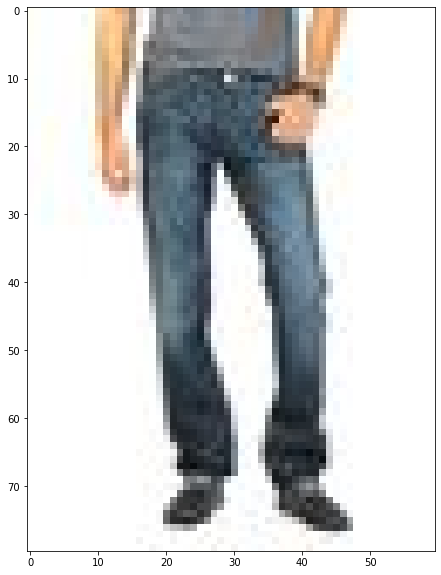

In [42]:
temp=0
img =val.iloc[0,1:].values
img_rgb  = np.reshape(val.iloc[temp,1:].values, newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_rgb)
#axarr[1].imshow(train_data.iloc[temp,3], cmap='gray')

**Sanity checking test data**

In [44]:
test = pd.read_csv('output_rgb_test.csv')
test.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


<Figure size 2016x2016 with 0 Axes>

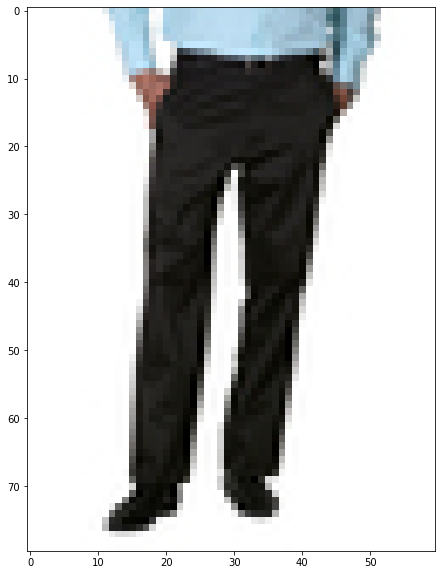

In [45]:
temp=0
img_rgb  = np.reshape(test.iloc[temp,1:].values, newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_rgb)
#axarr[1].imshow(train_data.iloc[temp,3], cmap='gray')

In [49]:
train = pd.read_csv('output_rgb.csv')
train.head(5)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


**Sanity checking train data**

<Figure size 2016x2016 with 0 Axes>

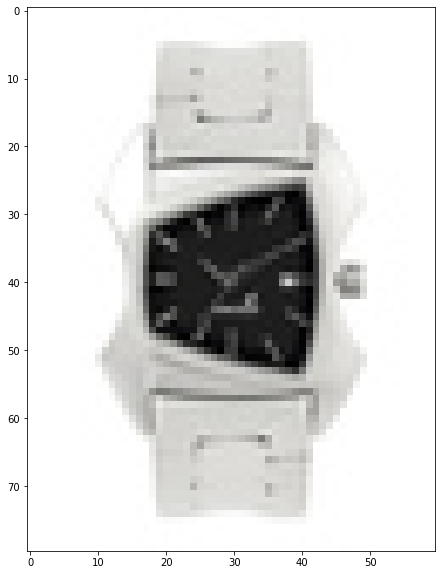

In [50]:
temp=1

img_rgb  = np.reshape(train.iloc[temp,1:].values, newshape=(80,60,3))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_rgb)
#axarr[1].imshow(train_data.iloc[temp,3], cmap='gray')

In [44]:
train = pd.read_csv('output_rgb.csv')
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
